In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
os.chdir("C:\\Users\\amite\\OneDrive\\Desktop\\New folder")

In [6]:
df=pd.read_csv("C:\\Users\\amite\\OneDrive\\Desktop\\New folder\\advertising.csv")

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


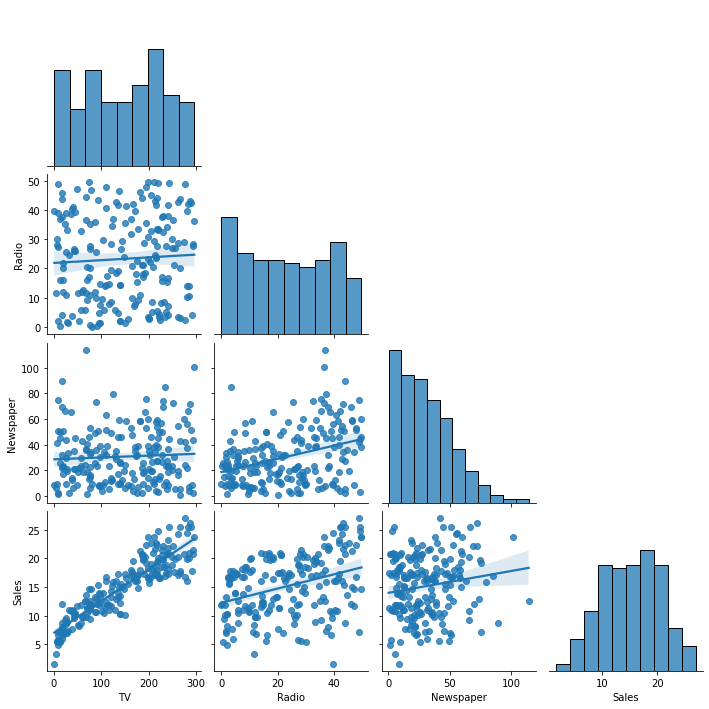

In [16]:
sns.pairplot(df,kind='reg',corner=True)

As from given pairplot we can see that quantity of my TV increasing proportionatily my sales are increasing here we can predict Sales over Tv so TV is my independent varible and sales is my dependend variable.

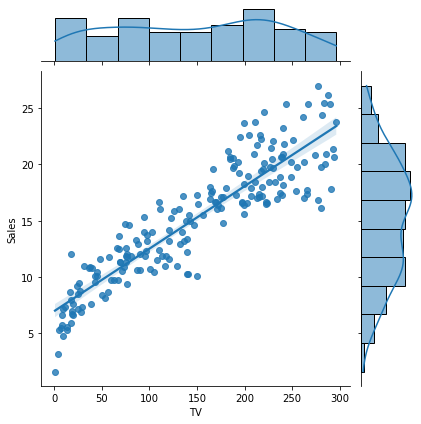

In [18]:
sns.jointplot(x='TV',y='Sales',data=df,kind='reg')

<AxesSubplot:>

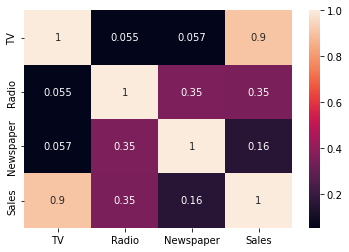

In [22]:
sns.heatmap(df.corr(),annot=True)

TV and sales having correlation 0.9

In [23]:
X=df[['TV']] #independend varible
y=df['Sales']#dependent variable

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
#Creating and fitting model object 
X=sm.add_constant(X)#add constant coefficient
lm=sm.OLS(y,X)#creates a object model
model=lm.fit()# fits the created model

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.93e-74
Time:                        08:42:20   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params

const    6.974821
TV       0.055465
dtype: float64

In [34]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.9748,0.323,21.624,0.000,6.339,7.611
TV,0.0555,0.002,29.260,0.000,0.052,0.059


In [35]:
model.f_pvalue #if p value is less than 0.05 model is more sigmificant

7.927911625320458e-74

In [36]:
#accuracy
model.rsquared*100

81.21757029987414

In [37]:
model.fittedvalues[0:5]#estimated y values over real x values

0    19.737265
1     9.443004
2     7.928816
3    15.377734
4    17.002852
dtype: float64

In [38]:
model.predict()[0:5]

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199])

In [40]:
#Creating model by using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [42]:
reg=LinearRegression()
model=reg.fit(X,y)
model

LinearRegression()

In [43]:
model.intercept_#constant value

6.974821488229891

In [44]:
model.coef_

array([0.        , 0.05546477])

In [45]:
model.predict(X)[0:5]# Estimated y (sales) values over X

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199])

In [49]:
#how much would the estimated sales value increase for 30 units of TV ad spend
model.predict([[1,30]])#over 1 company 

array([8.6387646])

In [51]:
model.predict([[1,5],[1,90],[1,200]])#3 companies can invest

array([ 7.25214534, 11.96665083, 18.06777558])

In [53]:
#root mean squared error value for the model
ypred=model.predict(X)
mse=mean_squared_error(y,ypred)
rmse=np.sqrt(mse)
rmse

2.2842381438447106

In [55]:
r2=r2_score(y,model.predict(X))
r2*100

81.21757029987414

Model Equation: Sales = 6.974821488229891 + TV * 0.055464770469558874
Error Value of the Model (RMSE): 2.2842381438447106
Success Percentage of the Created Model: 81.21757029987414